# Data Reading

In [117]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn #for background style for plots
from matplotlib.pyplot import figure #plot size
import matplotlib.style #Setting the theme of your plots

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows',100)

In [118]:
data=pd.read_csv("telecome.csv.csv")
print(data.shape)
data.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# EDA & Prepocessing

In [119]:
#Checking whether data is balanced or imbalanced
yes=len(data[data['Churn']=='Yes'])
no=len(data[data['Churn']=='No'])
tot=len(data)

yes=(yes/tot)*100
no=(no/tot)*100

print('yes= ',yes,'%','\n no= ',no,'%')

yes=  26.536987079369588 % 
 no=  73.4630129206304 %


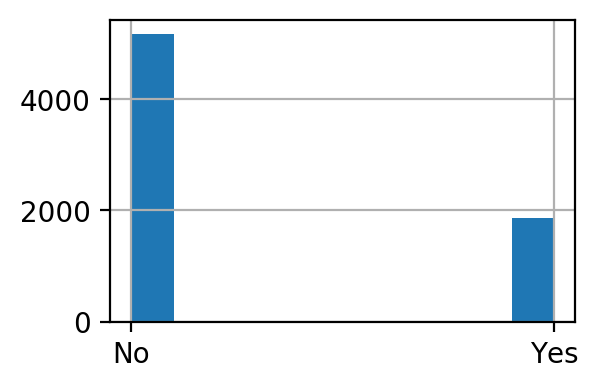

In [120]:
figure(num=None, figsize=(3, 2), dpi=200)
data['Churn'].hist()

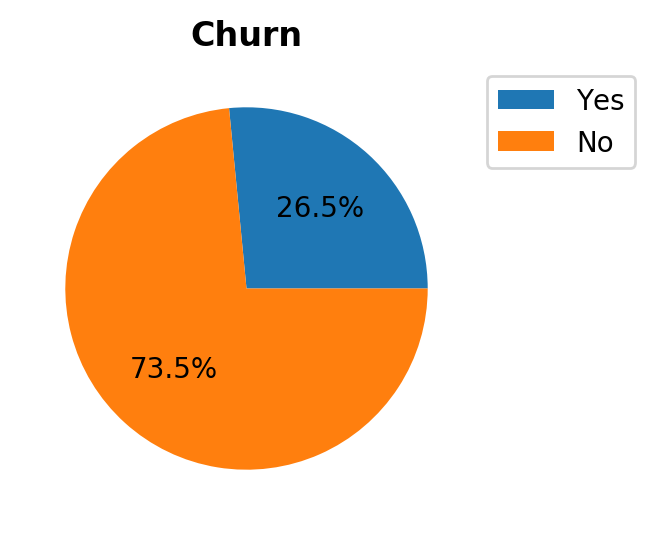

In [121]:
#Pie Chart
#Calculating Sales Percentage
Churn_Perc=[yes,no]
figure(num=None, figsize=(5, 3), dpi=200)
plt.pie(Churn_Perc,autopct='%1.1f%%')
plt.title("Churn",weight="bold")
labels=['Yes','No']
plt.legend(labels,bbox_to_anchor=(1, 1))
plt.show()


In [122]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [123]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
#Null value treatment
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [125]:
#Converting TotalCharges into float
#Replacing spaces with null values in total charges column
data['TotalCharges'] = data["TotalCharges"].replace(" ",np.nan)
data.TotalCharges=pd.to_numeric(data.TotalCharges)
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [126]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [127]:
#Replace null with mean
data.fillna(data.TotalCharges.mean(),inplace=True)

In [14]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

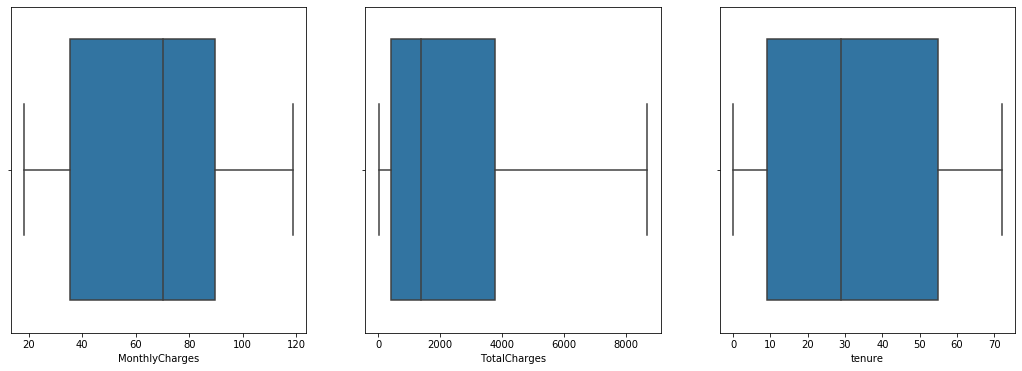

In [128]:
#Outliers
import seaborn as sns

fig, axs = plt.subplots(1,3, figsize = (18,6))

sns.boxplot(data.MonthlyCharges, ax = axs[0])
sns.boxplot(data.TotalCharges, ax = axs[1])
sns.boxplot(data.tenure, ax = axs[2])
plt.tight_layout
plt.show()


In [16]:
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
#verifying categorical data
cat_cols=data.select_dtypes(exclude=['int64', 'float']).columns
cat_cols

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [129]:
#verifying categorical data

for i in cat_cols:
    if i!='customerID':
      print(i,'=',data[i].unique())


gender = ['Female' 'Male']
Partner = ['Yes' 'No']
Dependents = ['No' 'Yes']
PhoneService = ['No' 'Yes']
MultipleLines = ['No phone service' 'No' 'Yes']
InternetService = ['DSL' 'Fiber optic' 'No']
OnlineSecurity = ['No' 'Yes' 'No internet service']
OnlineBackup = ['Yes' 'No' 'No internet service']
DeviceProtection = ['No' 'Yes' 'No internet service']
TechSupport = ['No' 'Yes' 'No internet service']
StreamingTV = ['No' 'Yes' 'No internet service']
StreamingMovies = ['No' 'Yes' 'No internet service']
Contract = ['Month-to-month' 'One year' 'Two year']
PaperlessBilling = ['Yes' 'No']
PaymentMethod = ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn = ['No' 'Yes']


In [19]:
#replace 'No internet service' to No for the following columns
data  = data.replace({'No internet service' : 'No'})
data  = data.replace({'No phone service' : 'No'})
#verifying categorical data
for i in cat_cols:
    if i!='customerID':
      print(i,'=',data[i].unique())

gender = ['Female' 'Male']
Partner = ['Yes' 'No']
Dependents = ['No' 'Yes']
PhoneService = ['No' 'Yes']
MultipleLines = ['No' 'Yes']
InternetService = ['DSL' 'Fiber optic' 'No']
OnlineSecurity = ['No' 'Yes']
OnlineBackup = ['Yes' 'No']
DeviceProtection = ['No' 'Yes']
TechSupport = ['No' 'Yes']
StreamingTV = ['No' 'Yes']
StreamingMovies = ['No' 'Yes']
Contract = ['Month-to-month' 'One year' 'Two year']
PaperlessBilling = ['Yes' 'No']
PaymentMethod = ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn = ['No' 'Yes']


In [138]:
#Binary columns with 2 values
bin_cols   = data.nunique()[data.nunique() == 2].keys().tolist()
bin_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [21]:
#Function for dictonary to store coding info about varaibles
info={}
def code_map(le,name):
    global info
    job_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    info[name]=job_name_mapping
    print(name,' :varaiable successfully coded')

In [22]:
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
for i in bin_cols:
    data[i]=le.fit_transform(data[i])
    code_map(le,i)
data.head()

gender  :varaiable successfully coded
SeniorCitizen  :varaiable successfully coded
Partner  :varaiable successfully coded
Dependents  :varaiable successfully coded
PhoneService  :varaiable successfully coded
MultipleLines  :varaiable successfully coded
OnlineSecurity  :varaiable successfully coded
OnlineBackup  :varaiable successfully coded
DeviceProtection  :varaiable successfully coded
TechSupport  :varaiable successfully coded
StreamingTV  :varaiable successfully coded
StreamingMovies  :varaiable successfully coded
PaperlessBilling  :varaiable successfully coded
Churn  :varaiable successfully coded


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [23]:
info

{'gender': {'Female': 0, 'Male': 1},
 'SeniorCitizen': {0: 0, 1: 1},
 'Partner': {'No': 0, 'Yes': 1},
 'Dependents': {'No': 0, 'Yes': 1},
 'PhoneService': {'No': 0, 'Yes': 1},
 'MultipleLines': {'No': 0, 'Yes': 1},
 'OnlineSecurity': {'No': 0, 'Yes': 1},
 'OnlineBackup': {'No': 0, 'Yes': 1},
 'DeviceProtection': {'No': 0, 'Yes': 1},
 'TechSupport': {'No': 0, 'Yes': 1},
 'StreamingTV': {'No': 0, 'Yes': 1},
 'StreamingMovies': {'No': 0, 'Yes': 1},
 'PaperlessBilling': {'No': 0, 'Yes': 1},
 'Churn': {'No': 0, 'Yes': 1}}

In [24]:
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols and i!='customerID']
multi_cols

['InternetService', 'Contract', 'PaymentMethod']

In [25]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [26]:
from sklearn.preprocessing import OneHotEncoder

data1 = pd.get_dummies(data ,columns = multi_cols )

data1.shape

(7043, 28)

In [27]:
data1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [28]:
data1=data1.drop('customerID',axis=1)
data1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,1,0,1,0,0,0,0,1,0


In [29]:
#Shift target variable to end
mid = data1['Churn']
data1.drop('Churn', axis=1,inplace = True)
data1['Churn']=mid
data1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,1,0,0,1,0,0,0,0,1,0,0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,1,0,0,0,1,0,0,0,0,1,0
2,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,0,0,1,0,0,0,0,0,1,1
3,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,1,0,0,0,1,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,0,1,0,1,0,0,0,0,1,0,1


In [160]:
#Correlation
cr=data1.corr(method='pearson')
corr_variables=[]

for i in cr.columns:
    for j in cr.columns:
        if i!=j:
            if cr[i][j]>0.8:
                corr_variables.append([i,j])
          
corr_variables                

[['tenure', 'TotalCharges'], ['TotalCharges', 'tenure']]

In [161]:
cr.Churn

gender                                    -0.008612
SeniorCitizen                              0.150889
Partner                                   -0.150448
Dependents                                -0.164221
tenure                                    -0.352229
PhoneService                               0.011942
MultipleLines                              0.040102
OnlineSecurity                            -0.171226
OnlineBackup                              -0.082255
DeviceProtection                          -0.066160
TechSupport                               -0.164674
StreamingTV                                0.063228
StreamingMovies                            0.061382
PaperlessBilling                           0.191825
MonthlyCharges                             0.193356
TotalCharges                              -0.199428
InternetService_DSL                       -0.124214
InternetService_Fiber optic                0.308020
InternetService_No                        -0.227890
Contract_Mon

In [61]:
#data Splitting
X=data1.iloc[:,0:-1]
y=data1.iloc[:,-1]

In [62]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
norm_data = MinMaxScaler().fit_transform(X)
norm_data=pd.DataFrame(norm_data,columns=X.columns)
norm_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.0,1.0,0.0,0.013889,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.115423,0.001275,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.472222,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.385075,0.215867,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.027778,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.354229,0.010310,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.625000,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.239303,0.210241,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.521891,0.015330,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [63]:
#model training
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

# Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve


RFC=RandomForestClassifier(n_estimators=100, bootstrap=True, criterion='gini')

RFC.fit(X_train,y_train)

y_pred=RFC.predict(X_test)

print('Confusion matrix:  \n', confusion_matrix(y_test,y_pred))
print('accuracy_score   :   ', accuracy_score(y_test,y_pred))

Confusion matrix:  
 [[1401  184]
 [ 251  277]]
accuracy_score   :    0.7941315664931378


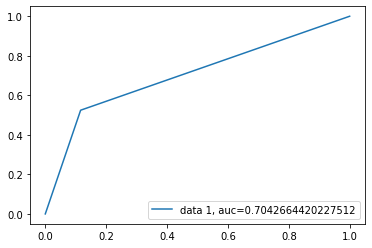

In [65]:
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# GradientBoosting


Accuracy 0.8059630856601988
Confusion matrix:  
 [[1416  169]
 [ 241  287]]


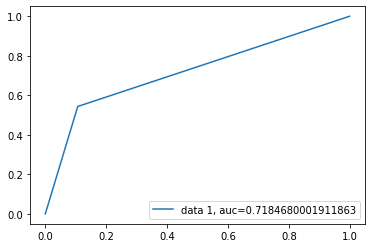

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier(random_state=1)
GBC.fit(X_train,y_train)
y_pred = GBC.predict(X_test)
print('Accuracy',accuracy_score(y_test,y_pred))
print('Confusion matrix:  \n', confusion_matrix(y_test,y_pred))
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# NaiveBayes

Accuracy 0.7543776620918126
Confusion matrix:  
 [[1161  424]
 [  95  433]]


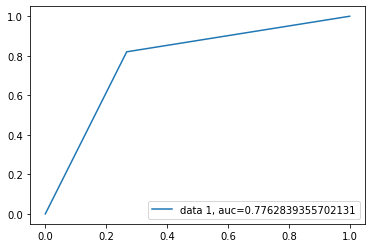

In [67]:
from sklearn.naive_bayes import GaussianNB
gnn=GaussianNB()

gnn.fit(X_train,y_train)
y_pred=gnn.predict(X_test)
print('Accuracy',accuracy_score(y_test,y_pred))
print('Confusion matrix:  \n', confusion_matrix(y_test,y_pred))
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Ada boost classifier

Accuracy 0.8106956933270232
Confusion matrix:  
 [[1416  169]
 [ 231  297]]


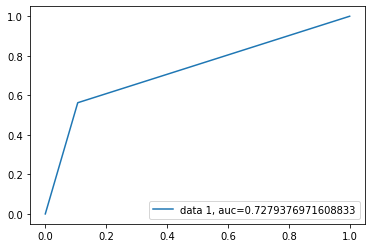

In [68]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=200,learning_rate=1)

model = abc.fit(X_train, y_train)


y_pred = model.predict(X_test)

print('Accuracy',accuracy_score(y_test,y_pred))
print('Confusion matrix:  \n', confusion_matrix(y_test,y_pred))
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [163]:
#So i have to save model
from sklearn.externals import joblib
joblib.dump(abc ,"adaboost.pkl")

['adaboost.pkl']

In [165]:
#Load Saved Model from joblib
CCA=joblib.load("adaboost.pkl")
CCA

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=200, random_state=None)

In [166]:
CCA.predict(X_test)

array([0, 0, 1, ..., 1, 1, 0])

In [169]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,0,1,0,1,0,0,0,0,1,0


In [170]:
input=[0,0,1,0,1,0,0,0,1,0,0,0,0,1,220,2000,1,0,0,1,0,0,0,0,1,0]
len(input)

26

In [172]:
CCA.predict([input])

array([1])

[0.03823297 0.02540723 0.03078262 0.02561537 0.13942133 0.00766289
 0.02494573 0.02428597 0.02825862 0.0251031  0.02660939 0.02202867
 0.02318824 0.03080045 0.13169692 0.14870661 0.01267142 0.03402239
 0.01364432 0.08189248 0.01127603 0.01916573 0.0123605  0.01292399
 0.03829283 0.01100417]


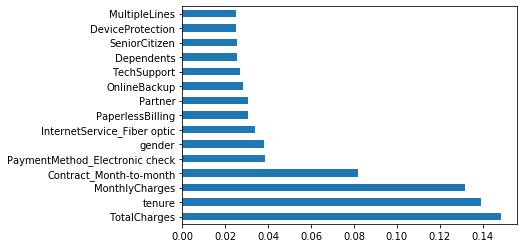

In [69]:
#Feature importance
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [44]:
f_cols=feat_importances.nlargest(4).index.to_list()
f_cols

['TotalCharges', 'tenure', 'MonthlyCharges', 'Contract_Month-to-month']

In [70]:
X1=data1[f_cols]
y1=y

In [71]:
#Standardization
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
norm_data = MinMaxScaler().fit_transform(X1)
norm_data=pd.DataFrame(norm_data,columns=X1.columns)
norm_data.head()

,TotalCharges,tenure,MonthlyCharges,Contract_Month-to-month
0,0.001275,0.013889,0.115423,1.0
1,0.215867,0.472222,0.385075,0.0
2,0.010310,0.027778,0.354229,1.0
3,0.210241,0.625000,0.239303,0.0
4,0.015330,0.027778,0.521891,1.0


In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size=0.3,random_state=1)

# Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve


RFC=RandomForestClassifier(n_estimators=100, bootstrap=True, criterion='gini')

RFC.fit(X_train,y_train)

y_pred=RFC.predict(X_test)

print('Confusion matrix:  \n', confusion_matrix(y_test,y_pred))
print('accuracy_score   :   ', accuracy_score(y_test,y_pred))

Confusion matrix:  
 [[1382  203]
 [ 266  262]]
accuracy_score   :    0.7780407004259347


# Ada boost Classifier

Accuracy 0.8106956933270232
Confusion matrix:  
 [[1416  169]
 [ 231  297]]


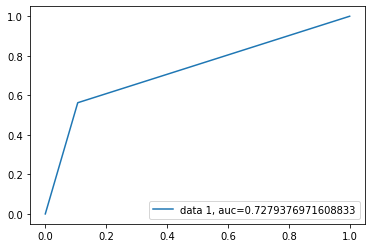

In [66]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=200,learning_rate=1)

model = abc.fit(X_train, y_train)


y_pred = model.predict(X_test)

print('Accuracy',accuracy_score(y_test,y_pred))
print('Confusion matrix:  \n', confusion_matrix(y_test,y_pred))
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [78]:
#data Splitting
X=data1.iloc[:,0:-1]
y=data1.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [75]:
#!pip install -U imbalanced-learn
#!pip install imblearn

# Oversampling

In [174]:
#Treatment to to unbalancing
#oversampling minority class using smote
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state = 0)
X2, y2 = os.fit_resample(X, y)

C:\Users\reshw\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [175]:
len(X2),len(y2)

(10348, 10348)

In [176]:
X2=pd.DataFrame(X2,columns=X.columns)

frame = { 'Churn': y2}
y2=pd.DataFrame(frame)

In [177]:
y2['Churn'].value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

In [178]:
X_train,X_test,y_train,y_test = train_test_split(X2,y2,test_size=0.3,random_state=1)

In [179]:
#Ranom Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve


RFC=RandomForestClassifier(n_estimators=100, bootstrap=True, criterion='gini')

RFC.fit(X_train,y_train)

y_pred=RFC.predict(X_test)

print('Confusion matrix:  \n', confusion_matrix(y_test,y_pred))
print('accuracy_score   :   ', accuracy_score(y_test,y_pred))

C:\Users\reshw\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Confusion matrix:  
 [[1387  195]
 [ 256 1267]]
accuracy_score   :    0.8547504025764895


In [182]:
input=[0,0,1,0,1,0,0,0,1,0,1,0,0,1,220,2200,1,0,0,1,0,0,0,0,1,0]
RFC.predict([input])

array([0])

# Under Sampling

In [114]:
from imblearn.under_sampling import NearMiss

# define the undersampling method
undersample = NearMiss(version=1, n_neighbors=3)

# transform the dataset
X3, y3 = undersample.fit_resample(X, y)
len(X3),len(y3)

C:\Users\reshw\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\reshw\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\reshw\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(3738, 3738)

In [115]:
X_train,X_test,y_train,y_test = train_test_split(X3,y3,test_size=0.3,random_state=1)

In [116]:
#Ranom Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve


RFC=RandomForestClassifier(n_estimators=100, bootstrap=True, criterion='gini')

RFC.fit(X_train,y_train)

y_pred=RFC.predict(X_test)

print('Confusion matrix:  \n', confusion_matrix(y_test,y_pred))
print('accuracy_score   :   ', accuracy_score(y_test,y_pred))

Confusion matrix:  
 [[383 203]
 [170 366]]
accuracy_score   :    0.6675579322638147
